In [75]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output

In [76]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/'
replicate='ns_task_18_0_12-28-17-7012-539110600/'
filepath=repository+replicate
file_finalPositions='final_positions.csv'
file_Descriptors='MD_Cart_WDH.csv'

In [77]:
# Import data from csv - final positions
list_positions = []
with open(filepath+file_finalPositions, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        list_positions.append(row[:-1]) # Last character is empty for some reason
# Import data from csv - descriptors
list_descriptors = []
with open(filepath+file_Descriptors, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        list_descriptors.append(row[:-1]) # Last character is empty for some reason

In [78]:
# Estimate average for each generation
population = 20
EVALUATIONS = len(list_positions)
featureSize = len(list_positions[0])
generations = int(evaluations / population)

interval=25
rangeValues = range(0,evaluations,interval)
lenRange = len(rangeValues)

print("Number of evaluations: ", evaluations, "Features size: ", featureSize, "Generations: ", generations)
data_positions = np.array([[float(y) for y in x] for x in list_positions]) # Convert to array
data_descriptors = np.array([[float(y) for y in x] for x in list_descriptors]) # Convert to array

Number of evaluations:  5060 Features size:  4 Generations:  253


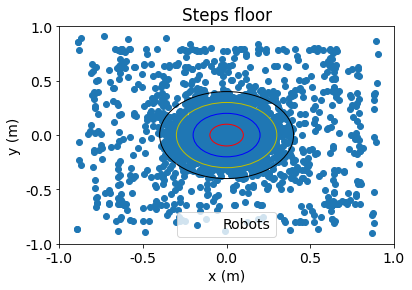

In [79]:
# Plot stuff
xValues = list(range(population, evaluations, population))
xValues = [x/population for x in xValues]
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

# plt.plot(xValues, progressSparseness, '-', color='blue',  linewidth=2.5)

plt.scatter(data_positions[:,1], data_positions[:,2])

plt.xlabel('x (m)')
plt.ylabel('y (m)')

axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])

rangeX = np.arange(-1.0,1.5,0.5) # Why are these offsets necessary?
posX = np.arange(-1.0,1.5,0.5) # Why are these offsets necessary?
plt.xticks(posX,rangeX)
plt.yticks(posX,rangeX)

plt.legend(['Robots'])
plt.title("Steps floor")

# Draw start and target positions
circle1 = plt.Circle((0, 0.0), 0.1, color='r', fill=0)
axes.add_patch(circle1)
circle1 = plt.Circle((0.0, 0.0), 0.2, color='b', fill=0)
axes.add_patch(circle1)
circle1 = plt.Circle((0.0, 0.0), 0.3, color='y', fill=0)
axes.add_patch(circle1)
circle1 = plt.Circle((0.0, 0.0), 0.4, color='k', fill=0)
axes.add_patch(circle1)

plt.savefig(repository+replicate+'ScatterPos.png',dpi=200)

In [67]:
temp = data_positions[:,1] +  data_positions[:,2]
print(len(temp))
euclideanDist_list = []
for i in range(EVALUATIONS):
    euclideanDist_list.append(np.linalg.norm(data_positions[i,1:2]-[0,0]))

print(len(euclideanDist_list))
print(data_positions[:5])
print(euclideanDist_list[:5])
euclideanDist_array = np.array(euclideanDist_list) # Convert to array

5060
5060
[[ 0.00000e+00  7.55258e-02 -7.27402e-02  6.13481e-02]
 [ 1.00000e+00  5.75890e-04  4.25706e-04  1.11966e-01]
 [ 2.00000e+00  2.17655e-04  3.03954e-05  8.36273e-02]
 [ 3.00000e+00  7.28957e-02 -1.00609e-01  1.14616e-01]
 [ 4.00000e+00  1.44541e-01  8.28850e-02  8.84434e-02]]
[0.1068096106690779, 0.0008144314484350417, 0.00030781065291831603, 0.10309008757868042, 0.20441184251896952]


In [68]:
positions_filter = data_positions[euclideanDist_array>0.5]
print(len(positions_filter))
print(positions_filter[:5])

id_intergers = [int(i) for i in positions_filter[:,0]]
robots_filter = data_descriptors[id_intergers]
print(len(robots_filter))
print(robots_filter[:10,5])

wheel_filter = robots_filter[robots_filter[:,5]>0]
print(len(wheel_filter))

718
[[ 5.50000e+01 -8.14628e-01 -8.83298e-01  7.02102e-02]
 [ 6.40000e+01  3.73090e-01 -8.50042e-01  7.01955e-02]
 [ 7.00000e+01 -5.70414e-01 -2.22401e-01  7.01107e-02]
 [ 7.30000e+01  5.19358e-01 -8.31881e-02  7.00972e-02]
 [ 7.60000e+01 -5.54054e-01 -1.26334e-02  8.92506e-02]]
718
[0.25   0.3125 0.25   0.25   0.1875 0.3125 0.3125 0.3125 0.375  0.3125]
717


In [69]:
positions_filter = data_positions[euclideanDist_array>0.5]
id_intergers = [int(i) for i in positions_filter[:,0]]
robots_filter = data_descriptors[id_intergers]
wheel_filter = robots_filter[robots_filter[:,5]>0]
print(len(wheel_filter)/len(positions_filter))

0.9986072423398329


In [70]:
percentage_list = []
for i in np.arange(0.0,0.5,0.1):
    positions_filter = data_positions[data_positions[:,2]>i]
    id_intergers = [int(i) for i in positions_filter[:,0]]
    robots_filter = data_descriptors[id_intergers]
    wheel_filter = robots_filter[robots_filter[:,5]>0]
    print(len(wheel_filter)/len(positions_filter))
    percentage_list.append(len(wheel_filter)/len(positions_filter)*100)

0.8845671267252195
0.9748490945674044
0.9878048780487805
1.0
1.0


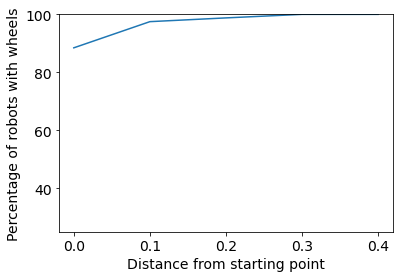

In [71]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

# plt.plot(xValues, progressSparseness, '-', color='blue',  linewidth=2.5)

plt.plot(percentage_list)

plt.xlabel('Distance from starting point')
plt.ylabel('Percentage of robots with wheels')

axes = plt.gca()
axes.set_ylim([25,100])

rangeX = range(0,len(percentage_list),1) # Why are these offsets necessary?
posX = ['0.0', '0.1', '0.2', '0.3', '0.4']
plt.xticks(rangeX,posX)
# plt.yticks(posX,rangeX)

# plt.legend(['Robots'])
# plt.title("Flat floor")

# # Draw start and target positions
# circle1 = plt.Circle((0, 0.75), 0.1, color='r', fill=0)
# axes.add_patch(circle1)
# circle1 = plt.Circle((0, -0.75), 0.1, color='b', fill=0)
# axes.add_patch(circle1)

plt.savefig(repository+replicate+'wheelPercentage.png',dpi=200)

In [72]:
positions_filter = data_positions[euclideanDist_array>0.5]
id_intergers = [int(i) for i in positions_filter[:,0]]
robots_filter = data_descriptors[id_intergers]
wheel_filter = robots_filter[robots_filter[:,5]>0]
print(len(wheel_filter)/len(positions_filter))

0.9986072423398329


In [73]:
percentage_list = []
for i in np.arange(0.0,0.5,0.1):
    positions_filter = data_positions[data_positions[:,2]>i]
    id_intergers = [int(i) for i in positions_filter[:,0]]
    robots_filter = data_descriptors[id_intergers]
    wheel_filter = robots_filter[robots_filter[:,7]>0]
    print(len(wheel_filter)/len(positions_filter))
    percentage_list.append(len(wheel_filter)/len(positions_filter)*100)

0.27310748640736093
0.33601609657947684
0.3710801393728223
0.3284671532846715
0.2964169381107492


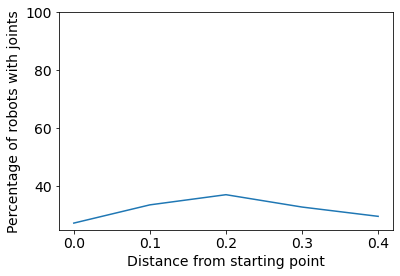

In [74]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

# plt.plot(xValues, progressSparseness, '-', color='blue',  linewidth=2.5)

plt.plot(percentage_list)

plt.xlabel('Distance from starting point')
plt.ylabel('Percentage of robots with joints')

axes = plt.gca()
axes.set_ylim([25,100])

rangeX = range(0,len(percentage_list),1) # Why are these offsets necessary?
posX = ['0.0', '0.1', '0.2', '0.3', '0.4']
plt.xticks(rangeX,posX)
# plt.yticks(posX,rangeX)

# plt.legend(['Robots'])
# plt.title("Flat floor")

# # Draw start and target positions
# circle1 = plt.Circle((0, 0.75), 0.1, color='r', fill=0)
# axes.add_patch(circle1)
# circle1 = plt.Circle((0, -0.75), 0.1, color='b', fill=0)
# axes.add_patch(circle1)

plt.savefig(repository+replicate+'jointsPercentage.png',dpi=200)